<a href="https://colab.research.google.com/github/nbegumc/RFM-Analysis-and-KMeans_Clustering/blob/main/RFM_Analysis_%26_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/test_msa_bb.csv',low_memory=False)


In [ ]:
data.head()

,email,phone,first_name,last_name,zip,city,state,country,birthday_year,gender,age,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,conversion_currency,ad_click_id_value
0,5b31baf92171234adacc3aaf0ee5a14cf0b1adb35194,3567550f9cf51d6b9fe94cbbf17f8cf5da83677b20a6,be34ad33b31774df67565b3db888fa2361331e6566f1,1086b76dc02f395636156d9ca711d54a043f6640c690,92027,licata,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-08,918183,377.0,154.22,18.0,EUR,NaN
1,b47a23dfa8a71dd52879e32b46b95d3b0673e6ea38b0,0ff8479f1516d3de1091624ded4b0eeb2a0144854801,e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6,bd3dae5fb91f88a4f0978222dfd58f59a124257cb081,36100,vicenza,NaN,IT,NaN,NaN,NaN,Cancel,2020-08-07,917656,-643.5,-48.29,-5.0,EUR,NaN
2,6929f69b848bb6ea80905aa169a80c962644f6e1ea89,09a7a47a69b67e1d65c4ce385ec430bf49397261f38c,208ad55e4c4200ca42a73ab260efd6df57efccc95aad,3d67c6abd93267d5c5cb698b79401f76615b8f47f9a9,71016,san severo,NaN,IT,NaN,NaN,NaN,ReturnToSender,2020-08-07,905587,-318.5,-198.33,-183.1,EUR,NaN
3,c5c2d17bbf20b772ff72abfcb2f5021cf02cebe422d3,c15aa8b05de5ccd5816dc3f69e8babbff8b8998b0e64,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f,0f46ffbc599ddb2ebbd4b73dad90f240f502798a7986,20038,busto garolfo,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-08,918391,462.8,307.12,44.0,EUR,NaN
4,e60a1afac6a840b383ad8172de7304eb404348e72f66,f09585362157ce6813345220cc5de55cc72e01c9905f,09c12d01508bb6b857cf2f84199fb3134b58985806b4,cd165a891948a7ffae249980f8ca64e963f73f4116bc,10048,vinovo,NaN,IT,NaN,NaN,NaN,Cancel,2020-08-07,917776,-513.5,5.17,-5.0,EUR,NaN


In [ ]:
data.shape

(300000, 19)

In [ ]:
data.columns

Index(['email', 'phone', 'first_name', 'last_name', 'zip', 'city', 'state',
       'country', 'birthday_year', 'gender', 'age', 'conversion_name',
       'conversion_date', 'conversion_id', 'conversion_value',
       'conversion_value_margin', 'handling_cost', 'conversion_currency',
       'ad_click_id_value'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   email                    300000 non-null  object 
 1   phone                    300000 non-null  object 
 2   first_name               300000 non-null  object 
 3   last_name                300000 non-null  object 
 4   zip                      300000 non-null  object 
 5   city                     300000 non-null  object 
 6   state                    0 non-null       float64
 7   country                  300000 non-null  object 
 8   birthday_year            0 non-null       float64
 9   gender                   0 non-null       float64
 10  age                      0 non-null       float64
 11  conversion_name          300000 non-null  object 
 12  conversion_date          300000 non-null  object 
 13  conversion_id            300000 non-null  int64  
 14  conv

In [ ]:
data.isnull().sum() #checking null values

email                           0
phone                           0
first_name                      0
last_name                       0
zip                             0
city                            0
state                      300000
country                         0
birthday_year              300000
gender                     300000
age                        300000
conversion_name                 0
conversion_date                 0
conversion_id                   0
conversion_value                0
conversion_value_margin         0
handling_cost                   0
conversion_currency             0
ad_click_id_value          283989
dtype: int64

In [ ]:
columns=['country','conversion_name','conversion_currency'] # value counts of some columns
for i in columns:
  print(data[i].value_counts())

In [ ]:
#How many data points for each class are present? 
data['conversion_name'].value_counts() # value_counts

Purchase          267352
Return             19482
Cancel              8816
ReturnToSender      4350
Name: conversion_name, dtype: int64

In [ ]:
# create customer id:
import hashlib

data['customer_id'] = data[['email', 'phone','first_name','last_name']].sum(axis=1)
data['customer_id']=data['customer_id'].apply(lambda x:int(hashlib.md5(x.encode('utf-8')).hexdigest(), 16))

In [ ]:
columns_to_drop= ["email" , "phone","first_name","last_name","state","birthday_year","gender","age","ad_click_id_value","conversion_currency"]
conversions=data.drop(columns=columns_to_drop)
conversions.head(5)

,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,customer_id
0,92027,licata,IT,Purchase,2020-08-08,918183,377.0,154.22,18.0,265604738784653297277577277754309765861
1,36100,vicenza,IT,Cancel,2020-08-07,917656,-643.5,-48.29,-5.0,258120269365701147147850421282837983703
2,71016,san severo,IT,ReturnToSender,2020-08-07,905587,-318.5,-198.33,-183.1,30474875973338655909089856639814151501
3,20038,busto garolfo,IT,Purchase,2020-08-08,918391,462.8,307.12,44.0,115287082239797545719791071395481961324
4,10048,vinovo,IT,Cancel,2020-08-07,917776,-513.5,5.17,-5.0,147300219946719326783437676937462067159


In [ ]:
#change conversion_date type to data object
conversions['conversion_date']= pd.to_datetime(conversions['conversion_date'])

In [ ]:
conversions.dtypes

zip                                object
city                               object
country                            object
conversion_name                    object
conversion_date            datetime64[ns]
conversion_id                       int64
conversion_value                  float64
conversion_value_margin           float64
handling_cost                     float64
customer_id                        object
dtype: object

In [ ]:
conversions

,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,customer_id
0,92027,licata,IT,Purchase,2020-08-08,918183,377.00,154.22,18.0,265604738784653297277577277754309765861
1,36100,vicenza,IT,Cancel,2020-08-07,917656,-643.50,-48.29,-5.0,258120269365701147147850421282837983703
2,71016,san severo,IT,ReturnToSender,2020-08-07,905587,-318.50,-198.33,-183.1,30474875973338655909089856639814151501
3,20038,busto garolfo,IT,Purchase,2020-08-08,918391,462.80,307.12,44.0,115287082239797545719791071395481961324
4,10048,vinovo,IT,Cancel,2020-08-07,917776,-513.50,5.17,-5.0,147300219946719326783437676937462067159
...,...,...,...,...,...,...,...,...,...,...
299995,30035,mirano,IT,Return,2019-12-17,757589,-2366.91,-840.40,-86.1,2732255936885180669896979741869457483
299996,80055,portici,IT,Return,2019-01-28,564432,-2083.90,-477.07,-86.1,141207752199013011206896089506881247694
299997,80059,torre del greco,IT,Return,2019-11-21,743357,-2381.60,-847.44,-86.1,119964394957745228204456114975044006817
299998,37131,verona,IT,Return,2019-04-26,610021,-643.50,33.22,-86.1,82121394907710000221583262203121332388


In [ ]:
# is data unique? how many duplicated rows?
conversions.duplicated().sum()

8280

In [ ]:
#duplicated rows
conversions[conversions.duplicated()==True]

,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,customer_id
5048,73020,scorrano,IT,Cancel,2019-01-07,558878,-448.5,-9.13,-5.0,60046986342821727276053662887357546265
5169,84014,nocera inferiore,IT,ReturnToSender,2019-01-05,545019,-1625.0,-677.93,-140.1,273062009296821378511864705589888899146
5218,00153,roma,IT,Purchase,2019-01-16,566753,507.0,220.00,28.0,61065051504388041481878887226674026713
5232,52048,monte san savino,IT,Cancel,2019-01-07,558238,-507.0,-218.57,6.5,162388987854404212086522933295391860646
5317,62032,camerino,IT,Cancel,2019-01-23,571192,-578.5,-24.97,-5.0,103493702101417790008504857894840343997
...,...,...,...,...,...,...,...,...,...,...
299930,88040,san mango d'aquino,IT,Return,2019-01-11,549828,-591.5,-135.41,-86.1,318780640281376856536995270090905175899
299940,40065,pianoro nuovo,IT,Return,2019-01-18,558767,-903.5,-18.37,-86.1,322571241400138199987202972230565968249
299965,09018,sarroch,IT,Return,2019-01-11,552084,-227.5,23.21,-86.1,172574469282484377136717665838794891102
299968,00197,roma,IT,Return,2019-01-05,538444,-1157.0,-528.99,-86.1,68456014664929805395409964809374453917


In [ ]:
#duplicated rows
conversions[conversions.conversion_id==558878]

,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,customer_id
4784,73020,scorrano,IT,Cancel,2019-01-07,558878,-448.5,-9.13,-5.0,60046986342821727276053662887357546265
5048,73020,scorrano,IT,Cancel,2019-01-07,558878,-448.5,-9.13,-5.0,60046986342821727276053662887357546265
20748,73020,scorrano,IT,Purchase,2019-01-07,558878,448.5,9.13,3.0,60046986342821727276053662887357546265
26276,73020,scorrano,IT,Purchase,2019-01-07,558878,448.5,9.13,3.0,60046986342821727276053662887357546265


In [ ]:
#removing the duplicates

conversions_new=conversions.drop_duplicates()
conversions_new.duplicated().sum()

0

In [ ]:
conversions_new[conversions_new.conversion_id==558878]

,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,customer_id
4784,73020,scorrano,IT,Cancel,2019-01-07,558878,-448.5,-9.13,-5.0,60046986342821727276053662887357546265
20748,73020,scorrano,IT,Purchase,2019-01-07,558878,448.5,9.13,3.0,60046986342821727276053662887357546265


In [ ]:
conversions_new.shape

(291720, 10)

In [ ]:
conversions_new['conversion_name'] = np.where(conversions_new['conversion_name']=="Purchase", 'Purchase', 'Cancel')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
conversions_new.conversion_name.value_counts()

Purchase    260173
Cancel       31547
Name: conversion_name, dtype: int64

In [ ]:
# taking only cancelled conversions
cancelled_con=conversions_new.loc[conversions_new.conversion_name != 'Purchase',:]

#dropping cancelled transactions along with their respective Purchase records
transactions=conversions_new.drop(conversions_new[conversions_new.conversion_id.isin(cancelled_con['conversion_id'])].index.tolist())

In [ ]:
transactions.conversion_name.value_counts()

Purchase    237256
Name: conversion_name, dtype: int64

In [ ]:
# check whether all conversion_values are greater than 0

indeces=transactions[transactions['conversion_value']<=0].index.tolist() # 3 records with 0 conversion value, removed.

transactions=transactions.drop(indeces)

In [ ]:
transactions.shape

(237253, 10)

### EDA

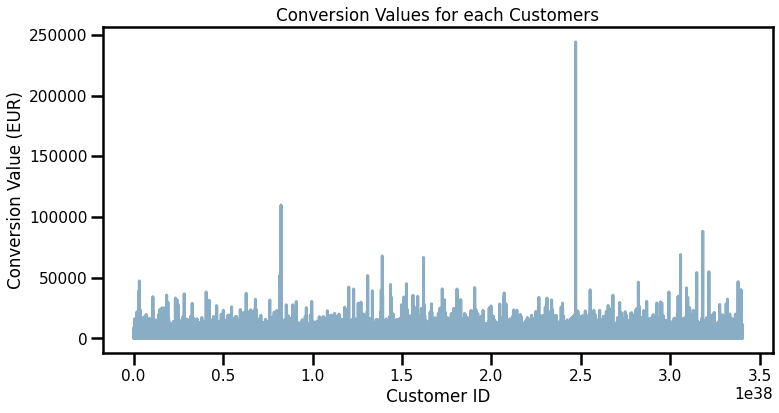

In [ ]:
#Conversion Values
con_by_cust=transactions.groupby(['customer_id','country'],as_index=False)['conversion_value'].sum()

plt.subplots(figsize=(12,6))
plt.plot(con_by_cust.customer_id, con_by_cust.conversion_value)
plt.xlabel('Customer ID')
plt.ylabel('Conversion Value (EUR)')
plt.title('Conversion Values for each Customers')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f39edd09e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f39edd10e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f39edc98ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f39edc98990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f39edd10410>,
  <matplotlib.lines.Line2D at 0x7f39edd10950>]}

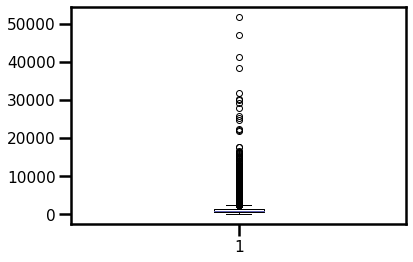

In [ ]:
# check for outliers:
plt.boxplot(transactions.conversion_value)

## RFM Analysis

**Calculating Recency**

In [ ]:
transactions.conversion_date.max() # most recent date in the data

Timestamp('2020-12-01 00:00:00')

In [ ]:
conversion_recency = transactions.groupby(by='customer_id',as_index=False)['conversion_date'].max()
conversion_recency.columns = ['customer_id', 'last_conversion_date']
most_recent_date = conversion_recency ['last_conversion_date'].max()
conversion_recency['recency'] = conversion_recency['last_conversion_date'].apply(lambda x: (most_recent_date - x).days)
conversion_recency.head()

,customer_id,last_conversion_date,recency
0,1383430095967598294630314023269086,2019-01-25,676
1,3812015245805375090764705683962553,2020-11-30,1
2,5311284380682789071623972454212986,2020-08-17,106
3,6557407918736560210040550462782606,2020-05-31,184
4,7765283162932345974473506240142801,2020-09-09,83


In [ ]:
conversion_recency.shape

(163619, 3)

{'boxes': [<matplotlib.lines.Line2D at 0x7f39f34b3ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f39f1acd6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f39f1b74150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f39f1ac0cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f39f1acda90>,
  <matplotlib.lines.Line2D at 0x7f39f1acdd90>]}

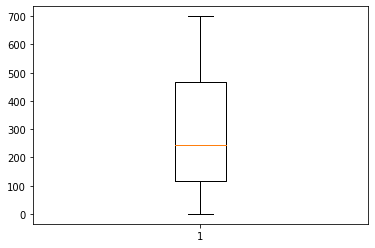

In [ ]:
plt.boxplot(conversion_recency.recency)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


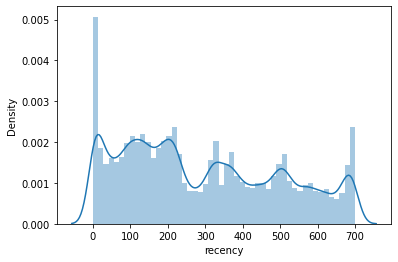

In [ ]:
ax = sns.distplot(conversion_recency.recency)

**Calculating Frequency**

In [ ]:
conversion_frequency = transactions.groupby(by=['customer_id'], as_index=False)['conversion_id'].count()
conversion_frequency.columns = ['customer_id', 'Frequency']
conversion_frequency.nlargest(5,'Frequency')

,customer_id,Frequency
30213,62907491328280302873357765510347494286,37
154581,321570265936582241677403886852325932508,36
122437,255190475567119680975844493167352802153,33
99277,207133099036770850408113759785992295307,30
39428,82388395314616895600446066208822196883,29


{'boxes': [<matplotlib.lines.Line2D at 0x7f39f1555190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f39f155c1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f39f1566210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f39f155cc90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f39f1555710>,
  <matplotlib.lines.Line2D at 0x7f39f1555c50>]}

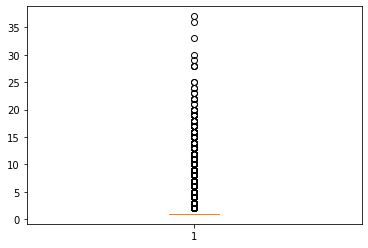

In [ ]:
plt.boxplot(conversion_frequency.Frequency)

In [ ]:
q1=np.percentile(conversion_frequency.Frequency,25)
q3=np.percentile(conversion_frequency.Frequency,75)
iqr=q3-q1

conversion_frequency[(conversion_frequency.Frequency> q3 + 1.5*iqr)].count()

customer_id    38816
Frequency      38816
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


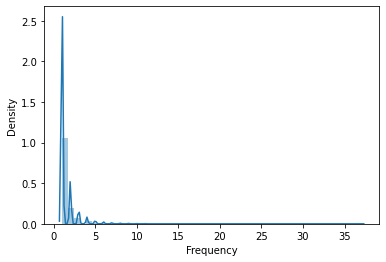

In [ ]:
sns.distplot(conversion_frequency.Frequency)

**Calculating Monetary Value**

In [ ]:
conversion_monetary = transactions.groupby(by='customer_id', as_index=False)['conversion_value'].sum()
conversion_monetary.columns = ['customer_id', 'Monetary_Value']
conversion_monetary.nlargest(5,'Monetary_Value')


,customer_id,Monetary_Value
118526,247059294909906536550909549756904966023,244214.10
39428,82388395314616895600446066208822196883,109962.32
152920,318147687957609630704740374722203831453,88285.60
146842,305718974474571017496944650631555794386,69112.16
66352,138989911013876499505139225206011632786,67970.50


In [ ]:
conversion_monetary.shape

(163619, 2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f39f1333090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f39f133a0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f39f1343110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f39f133ab90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f39f138c990>,
  <matplotlib.lines.Line2D at 0x7f39f1333b50>]}

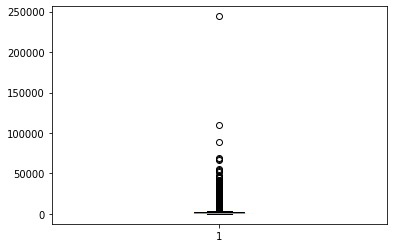

In [ ]:
plt.boxplot(conversion_monetary.Monetary_Value)

In [ ]:
q1=np.percentile(conversion_monetary.Monetary_Value,25)
q3=np.percentile(conversion_monetary.Monetary_Value,75)
iqr=q3-q1

conversion_monetary[(conversion_monetary.Monetary_Value>= q3 + 1.5*iqr)].count()

customer_id       13783
Monetary_Value    13783
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


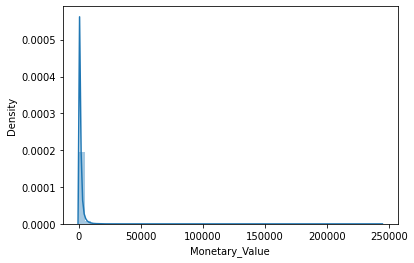

In [ ]:
sns.distplot(conversion_monetary.Monetary_Value)

In [ ]:
# frequency and monetary values are higly skewed

**Merging All 3 metrics in one dataframe**

In [ ]:
df = conversion_recency.merge(conversion_frequency, on='customer_id')
rfm_df = df.merge(conversion_monetary, on='customer_id').drop(columns='last_conversion_date')
rfm_df


,customer_id,recency,Frequency,Monetary_Value
0,1383430095967598294630314023269086,676,1,2717.0
1,3812015245805375090764705683962553,1,1,838.5
2,5311284380682789071623972454212986,106,1,1992.9
3,6557407918736560210040550462782606,184,1,717.6
4,7765283162932345974473506240142801,83,1,975.0
...,...,...,...,...
163614,340271389715883945260736110352516910736,8,1,227.5
163615,340273918822157263742708319568571710065,659,1,643.5
163616,340274115601787295052193005737873432182,436,1,1092.0
163617,340278231557278932241765393978890185590,6,1,2093.0


**Calculating RFM scores using quantile-based discretization**

**Calculate the R score**

In [ ]:
rfm_df['r'] = pd.qcut(rfm_df['recency'], q=5, labels=[5, 4, 3, 2, 1])

In [ ]:
rfm_df.groupby('r').agg(
    count=('customer_id', 'count'),
    min_recency=('recency', min),
    max_recency=('recency', max),
    std_recency=('recency', 'std'),    
    avg_recency=('recency', 'mean')
).sort_values(by='avg_recency')

,count,min_recency,max_recency,std_recency,avg_recency
r,,,,,
5,32969,0,92,30.145606,36.261063
4,32738,93,193,29.478890,141.523184
3,32587,194,333,46.056495,257.354681
2,32761,334,506,53.027179,418.341351
1,32564,507,700,63.533769,608.558500


In [ ]:
rfm_df.head()

,customer_id,recency,Frequency,Monetary_Value,r
0,1383430095967598294630314023269086,676,1,2717.0,1
1,3812015245805375090764705683962553,1,1,838.5,5
2,5311284380682789071623972454212986,106,1,1992.9,4
3,6557407918736560210040550462782606,184,1,717.6,4
4,7765283162932345974473506240142801,83,1,975.0,5


**Calculate the F score**

In [ ]:
rfm_df['f'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm_df.head()

,customer_id,recency,Frequency,Monetary_Value,r,f
0,1383430095967598294630314023269086,676,1,2717.0,1,1
1,3812015245805375090764705683962553,1,1,838.5,5,1
2,5311284380682789071623972454212986,106,1,1992.9,4,1
3,6557407918736560210040550462782606,184,1,717.6,4,1
4,7765283162932345974473506240142801,83,1,975.0,5,1


In [ ]:
rfm_df.groupby('f').agg(
    count=('customer_id', 'count'),
    min_frequency=('Frequency', min),
    max_frequency=('Frequency', max),
    std_frequency=('Frequency', 'std'),
    avg_frequency=('Frequency', 'mean')
).sort_values(by='avg_frequency')

,count,min_frequency,max_frequency,std_frequency,avg_frequency
f,,,,,
1,32724,1,1,0.000000,1.000000
2,32724,1,1,0.000000,1.000000
3,32723,1,1,0.000000,1.000000
4,32724,1,2,0.389244,1.186163
5,32724,2,37,1.809039,3.063990


**Calculate the M score**

In [ ]:
rfm_df['m'] = pd.qcut(rfm_df['Monetary_Value'], q=5, labels=[1, 2, 3, 4, 5])

In [ ]:
rfm_df.groupby('m').agg(
    count=('customer_id', 'count'),
    min_monetary_value=('Monetary_Value', min),
    max_monetary_value=('Monetary_Value', max),
    std_monetary_value=('Monetary_Value', 'std'),    
    avg_monetary_value=('Monetary_Value', 'mean')
).sort_values(by='avg_monetary_value')

,count,min_monetary_value,max_monetary_value,std_monetary_value,avg_monetary_value
m,,,,,
1,33900,20.54,643.5,128.351444,437.418313
2,31665,643.76,962.0,87.013551,798.204060
3,32755,962.65,1355.9,115.623591,1156.071823
4,32582,1356.68,2249.0,250.816220,1730.320808
5,32717,2249.78,244214.1,3475.563695,4421.906185


**RFM**

In [ ]:
rfm_df['rfm'] = rfm_df['r'].astype(str) +rfm_df['f'].astype(str) +rfm_df['m'].astype(str)
rfm_df.head()
                

,customer_id,recency,Frequency,Monetary_Value,r,f,m,rfm
0,1383430095967598294630314023269086,676,1,2717.0,1,1,5,115
1,3812015245805375090764705683962553,1,1,838.5,5,1,2,512
2,5311284380682789071623972454212986,106,1,1992.9,4,1,4,414
3,6557407918736560210040550462782606,184,1,717.6,4,1,2,412
4,7765283162932345974473506240142801,83,1,975.0,5,1,3,513


In [ ]:
rfm_df['rfm_score'] = rfm_df['r'].astype(int) +rfm_df['f'].astype(int) +rfm_df['m'].astype(int)
rfm_df.head()

,customer_id,recency,Frequency,Monetary_Value,r,f,m,rfm,rfm_score
0,1383430095967598294630314023269086,676,1,2717.0,1,1,5,115,7
1,3812015245805375090764705683962553,1,1,838.5,5,1,2,512,8
2,5311284380682789071623972454212986,106,1,1992.9,4,1,4,414,9
3,6557407918736560210040550462782606,184,1,717.6,4,1,2,412,7
4,7765283162932345974473506240142801,83,1,975.0,5,1,3,513,9


In [ ]:
rfm_df.groupby('rfm_score').agg(
    customers=('customer_id', 'count'),
    mean_recency=('recency', 'mean'),
    mean_frequency=('Frequency', 'mean'),
    mean_monetary=('Monetary_Value', 'mean'),
).sort_values(by='rfm_score')

,customers,mean_recency,mean_frequency,mean_monetary
rfm_score,,,,
3,1913,609.234710,1.000000,445.097235
4,5424,554.420907,1.000000,570.509889
5,10874,488.439673,1.000000,665.719061
6,17247,425.608860,1.000870,789.725465
7,21556,357.351225,1.005010,947.596644
8,21675,306.203875,1.016978,1105.614032
9,19869,255.382858,1.055061,1259.586612
10,16163,224.521562,1.177195,1503.778149
11,12986,228.651394,1.478207,2031.073910


**Defining the customer labels based on RFM scores:**

In [ ]:
def rfm_class(score):
    if  ((score >11) and (score < 16)):
        return 'Top Customer'
    elif ((score >6) and (score < 12)):
        return 'Good Customer'
    else:
        return 'Not Active Customer'

In [ ]:
rfm_df['class'] = rfm_df['rfm_score'].apply(lambda score : rfm_class(score))
rfm_df.head()

,customer_id,recency,Frequency,Monetary_Value,r,f,m,rfm,rfm_score,level,class
0,1383430095967598294630314023269086,676,1,2717.0,1,1,5,115,7,Good,Good Customer
1,3812015245805375090764705683962553,1,1,838.5,5,1,2,512,8,Good,Good Customer
2,5311284380682789071623972454212986,106,1,1992.9,4,1,4,414,9,Good,Good Customer
3,6557407918736560210040550462782606,184,1,717.6,4,1,2,412,7,Good,Good Customer
4,7765283162932345974473506240142801,83,1,975.0,5,1,3,513,9,Good,Good Customer


In [ ]:
rfm_df[rfm_df['rfm_score']==15].sort_values('Monetary_Value', ascending=False).head() #best customers

,customer_id,recency,Frequency,Monetary_Value,r,f,m,rfm,rfm_score,level,class
118526,247059294909906536550909549756904966023,50,28,244214.10,5,5,5,555,15,Best,Top Customer
39428,82388395314616895600446066208822196883,5,29,109962.32,5,5,5,555,15,Best,Top Customer
146842,305718974474571017496944650631555794386,15,28,69112.16,5,5,5,555,15,Best,Top Customer
151306,314767107854213595443094118469969023176,16,9,54294.50,5,5,5,555,15,Best,Top Customer
39164,81817896025382095508949190788412031856,86,18,52453.57,5,5,5,555,15,Best,Top Customer


In [ ]:
rfm_df['class'].value_counts()

Good Customer          92249
Top Customer           35912
Not Active Customer    35458
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


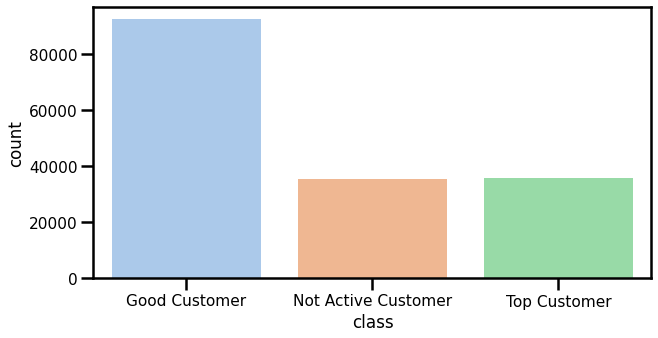

In [ ]:
plt.figure(figsize=(10,5))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('pastel')
sns.countplot(rfm_df['class'])

In [ ]:
rfm_df.groupby('class').agg({
    'recency' : ['mean', 'min','max'],
    'Frequency' : ['mean', 'min','max'],
    'Monetary_Value' : ['mean','min','max','count']
})

recency           ... Monetary_Value                 
                           mean min  max  ...            min       max  count
class                                     ...                                
Good Customer        281.980759   0  700  ...         136.50   38356.5  92249
Not Active Customer  474.488522  93  700  ...          20.54    2249.0  35458
Top Customer         136.461823   0  506  ...         644.80  244214.1  35912

[3 rows x 10 columns]

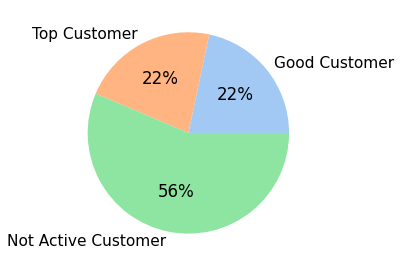

In [ ]:
#Visualizing the customer segments
data = rfm_df['class'].value_counts()
labels = rfm_df['class'].value_counts().index

colors = sns.color_palette('pastel')[0:5]
plt.pie(data.sort_values(axis=0), labels = labels, colors = colors, autopct='%.0f%%')
plt.tight_layout()
plt.show()

**K-MEANS CLUSTERING**

requirements


1.   Data distribution is not skewed
2.   Data is standardized


In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
#log transform monetary value
log_mon=np.log(conversion_monetary.Monetary_Value+1)

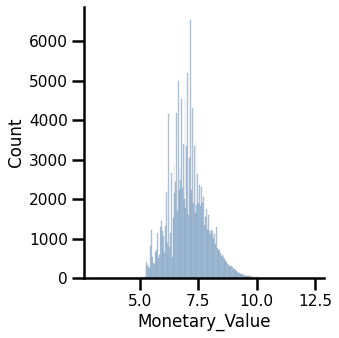

In [ ]:
sns.displot(log_mon)

In [ ]:
#log transform frequency
log_freq=np.log(conversion_frequency.Frequency+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


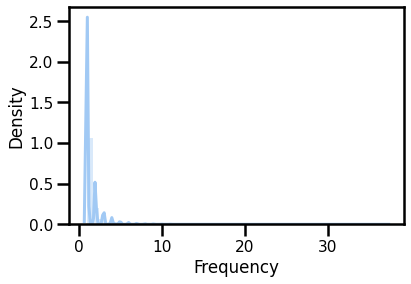

In [ ]:
sns.distplot(conversion_frequency.Frequency)

In [ ]:
dfs=[conversion_recency.customer_id,conversion_recency.recency,log_freq,log_mon]
rfm_log=pd.concat(dfs,axis=1).set_index('customer_id')
rfm_log

,recency,Frequency,Monetary_Value
customer_id,,,
1383430095967598294630314023269086,676,0.693147,7.907652
3812015245805375090764705683962553,1,0.693147,6.732806
5311284380682789071623972454212986,106,0.693147,7.597848
6557407918736560210040550462782606,184,0.693147,6.577305
7765283162932345974473506240142801,83,0.693147,6.883463
...,...,...,...
340271389715883945260736110352516910736,8,0.693147,5.431536
340273918822157263742708319568571710065,659,0.693147,6.468475
340274115601787295052193005737873432182,436,0.693147,6.996681


**Scaling the values**

In [ ]:
scaler = StandardScaler()
x_scaled=scaler.fit(rfm_log)
x_scaled = scaler.fit_transform(rfm_log)
x_scaled

array([[ 1.84795024, -0.48291991,  1.02778112],
       [-1.39837056, -0.48291991, -0.44552894],
       [-0.89338733, -0.48291991,  0.63927285],
       ...,
       [ 0.69370285, -0.48291991, -0.11461748],
       [-1.37432374, -0.48291991,  0.70070053],
       [ 0.14543533,  0.87171962,  0.59008071]])

**Finding the Number of Clusters**

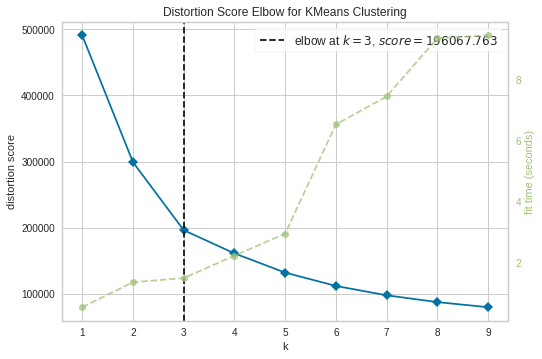

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(x_scaled)  
visualizer.show()   

 Cluster centers:
[[-0.66461695 -0.42265748 -0.42468925]
 [ 1.10342077 -0.36968997 -0.16101597]
 [-0.54622094  1.71838999  1.32088236]]


,recency,Frequency,Monetary_Value
cluster_pred,,,
0,73386,73386,73386
1,59363,59363,59363
2,30870,30870,30870


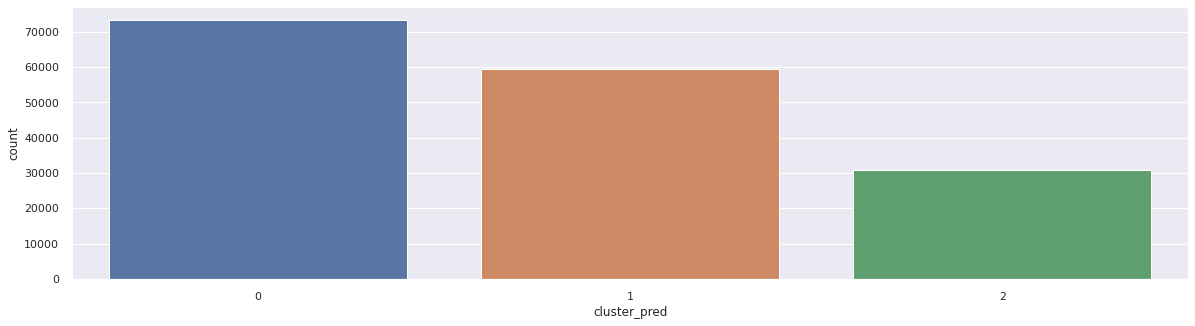

In [ ]:
# Applying K-Means with K=3

kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)

rfm_log_scaled = rfm_log.copy()
rfm_log_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

sns.set(style="darkgrid")
print(" Cluster centers:")
print(kmeans_scaled.cluster_centers_)


f, ax = plt.subplots(figsize=(20, 5))

ax = sns.countplot(x="cluster_pred", data=rfm_log_scaled)
rfm_log_scaled.groupby(['cluster_pred']).count()

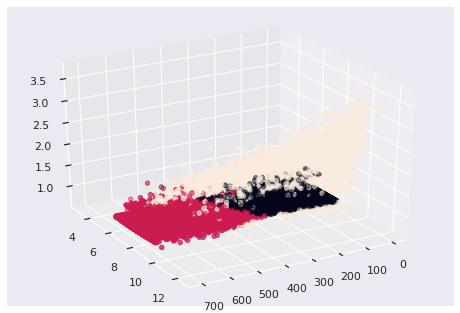

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=rfm_log_scaled['recency']
yline=rfm_log_scaled['Frequency']
zline=rfm_log_scaled['Monetary_Value']

ax.scatter3D(xline, zline,yline,c=rfm_log_scaled['cluster_pred'])
ax.view_init(30, 60)

 Cluster centers:
[[-0.61846885 -0.46239199 -0.66992156]
 [-0.58890365  2.54928651  1.66491207]
 [ 1.17012927 -0.38973177 -0.22723738]
 [-0.50215971  0.27050811  0.78761778]]


,recency,Frequency,Monetary_Value
cluster_pred,,,
0,59869,59869,59869
1,15604,15604,15604
2,54140,54140,54140
3,34006,34006,34006


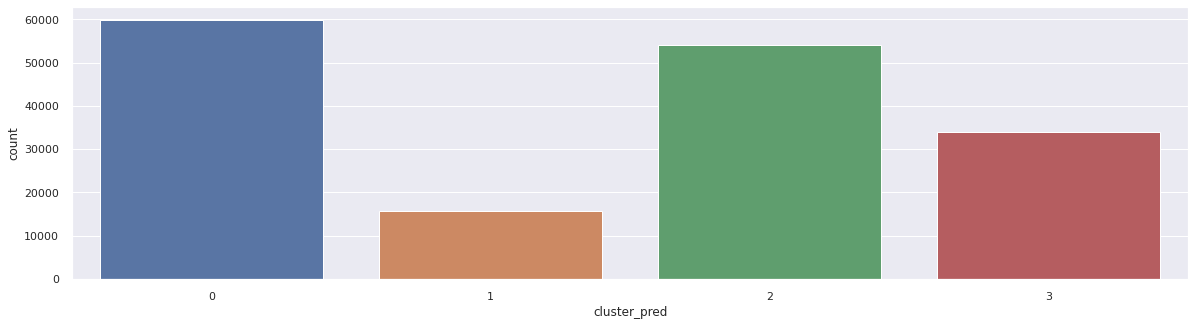

In [ ]:
# Applying K-Means with K=4


kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)

rfm_log_scaled = rfm_log.copy()
rfm_log_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

sns.set(style="darkgrid")
print(" Cluster centers:")
print(kmeans_scaled.cluster_centers_)


f, ax = plt.subplots(figsize=(20, 5))

ax = sns.countplot(x="cluster_pred", data=rfm_log_scaled)
rfm_log_scaled.groupby(['cluster_pred']).count()

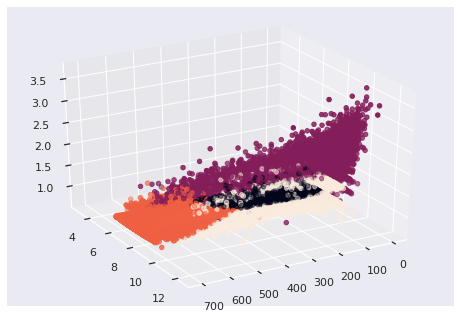

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=rfm_log_scaled['recency']
yline=rfm_log_scaled['Frequency']
zline=rfm_log_scaled['Monetary_Value']

ax.scatter3D(xline, zline,yline,c=rfm_log_scaled['cluster_pred'])
ax.view_init(30, 60)

**Clusters**

In [ ]:
rfm_df=rfm_df.merge(rfm_log_scaled['cluster_pred'],on='customer_id')

In [ ]:
# for 3 clusters:

rfm_df.groupby('cluster_pred').agg({
    'recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetary_Value' : ['mean','min','max','count']
})

recency            ... Monetary_Value                 
                    mean  min  max  ...            min       max  count
cluster_pred                        ...                                
0             153.746968    0  439  ...          20.54    5382.0  73386
1             521.406752  275  700  ...          41.60   13744.9  59363
2             178.241983    0  698  ...         642.20  244214.1  30870

[3 rows x 10 columns]

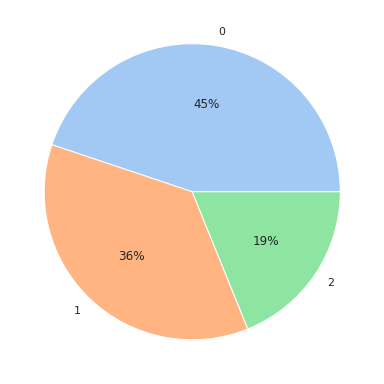

In [ ]:
#Visualizing the customer segments
data = rfm_df['cluster_pred'].value_counts()
labels = rfm_df['cluster_pred'].value_counts().index

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.tight_layout()
plt.show()

In [ ]:
# for 4 clusters:
rfm_df=rfm_df.merge(rfm_log_scaled['cluster_pred'],on='customer_id')

rfm_df.groupby('cluster_pred').agg({
    'recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetary_Value' : ['mean','min','max','count']
})

recency            ... Monetary_Value                 
                    mean  min  max  ...            min       max  count
cluster_pred                        ...                                
0             163.498856    0  452  ...          20.54    1540.5  59869
1             169.401307    0  696  ...         780.00  244214.1  15604
2             535.081585  317  700  ...          41.60   13744.9  54140
3             186.329060    0  690  ...         642.20   51797.2  34006

[4 rows x 10 columns]

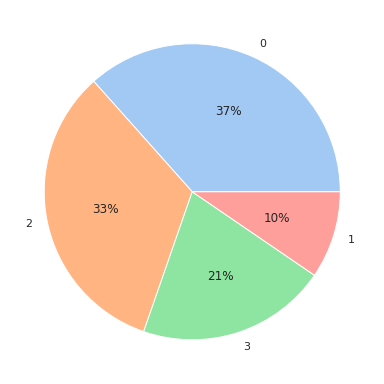

In [ ]:
#Visualizing the customer segments
data = rfm_df['cluster_pred'].value_counts()
labels = rfm_df['cluster_pred'].value_counts().index

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.tight_layout()
plt.show()